In [ ]:
#!/usr/bin/python
'''This cell creates .txt files for convert_imageset in Caffe.
'''

img_root = '/home/deep/develop/caffe/data/politics_project_data/data_11_16/images_aug/'
with open('/home/deep/develop/caffe/data/politics_project_data/data_11_16/annotations_aug.txt') as txt:
    for line in txt:
        line = line.strip()
        if line.find('.')>=0:
            linebuf = line
        else:
            print img_root + ' '.join([linebuf, str(int(line))])
            with open('/home/deep/develop/caffe/data/politics_project_data/data_11_16/train_aug_list.txt', 'a') as txto:
                txto.write(img_root + ' '.join([linebuf, str(int(line))])+'\n')
print 'Done.'


In [3]:
#!/usr/bin/python
'''This cell splits datalist.txt into train_list and val_list.
'''
with open('/home/deep/develop/caffe/data/leaders_images & augmentation/data_list_augmentation.txt') as txt:
    for i, line in enumerate(txt):
        line = line.strip()
        if i%4 > 0:
            with open('train_list_augmentation.txt','a') as train_list:
                train_list.write(line + '\n')
        else:
            with open('val_list_augmentation.txt','a') as val_list:
                val_list.write(line + '\n')
print 'Done.'


Done.


In [41]:
import os
os.chdir('/home/deep/develop/caffe/examples/mytask_leaders')
!cat ./create_lmdb.sh

#!/usr/bin/env sh
# Create the imagenet lmdb inputs
# N.B. set the path to the imagenet train + val data dirs
set -e

OUT=/home/deep/develop/caffe/data/politics_project_data/data_11_16
LIST=/home/deep/develop/caffe/data/politics_project_data/data_11_16
TOOLS=/home/deep/develop/caffe/build/tools

DATA_ROOT=/home/deep/develop/caffe/data/politics_project_data/data_11_16/images_val/

# Set RESIZE=true to resize the images to 256x256. Leave as false if images have
# already been resized using another tool.
RESIZE=true
if $RESIZE; then
  RESIZE_HEIGHT=227
  RESIZE_WIDTH=227
else
  RESIZE_HEIGHT=0
  RESIZE_WIDTH=0
fi

if [ ! -d "$DATA_ROOT" ]; then
  echo "Error: DATA_ROOT is not a path to a directory: $DATA_ROOT"
  echo "Set the DATA_ROOT variable in create_imagenet.sh to the path" \
       "where the data is stored."
  exit 1
fi

echo "Creating lmdb..."

GLOG_logtostderr=1 $TOOLS/convert_imageset \
    --resize_height=$RESIZE_HEIGHT \
    --resize_width=$RESIZE_WIDTH \
    --shuffle \
    $

In [42]:
"""create lmdb file

"""
!chmod u+x ./create_lmdb.sh
!./create_lmdb.sh

Creating lmdb...
I1117 17:09:50.233033 27036 convert_imageset.cpp:86] Shuffling data
I1117 17:09:50.641777 27036 convert_imageset.cpp:89] A total of 500 images.
I1117 17:09:50.642051 27036 db_lmdb.cpp:35] Opened lmdb /home/deep/develop/caffe/data/politics_project_data/data_11_16/val_lmdb
I1117 17:09:52.285338 27036 convert_imageset.cpp:153] Processed 500 files.
Done.


In [4]:
"""Make mean file

"""
os.chdir('/')
!chmod u+x /home/deep/develop/caffe/examples/mytask_leaders/make_mean.sh
!/home/deep/develop/caffe/examples/mytask_leaders/make_mean.sh


Done.


In [1]:
#!/usr/bin/python
"""This file converts .binaryproto to .npy.

"""
import caffe
import numpy as np

MEAN_PROTO_PATH = '/home/deep/imagenet_mean.binaryproto'               # 待转换的pb格式图像均值文件路径
MEAN_NPY_PATH = '/home/deep/imagenet_mean.npy'                         # 转换后的numpy格式图像均值文件路径

blob = caffe.proto.caffe_pb2.BlobProto()           # 创建protobuf blob
data = open(MEAN_PROTO_PATH, 'rb' ).read()         # 读入mean.binaryproto文件内容
blob.ParseFromString(data)                         # 解析文件内容到blob

array = np.array(caffe.io.blobproto_to_array(blob))# 将blob中的均值转换成numpy格式，array的shape （mean_number，channel, hight, width）
mean_npy = array[0]                                # 一个array中可以有多组均值存在，故需要通过下标选择其中一组均值
np.save(MEAN_NPY_PATH ,mean_npy)
print 'Done!'

Done!


In [ ]:
#!/usr/bin/python
"""This cell generates annotations.txt for background images (label = 0).

"""

import os
img_root = '/home/deep/develop/caffe/data/politics_project_data/data_11_16/backgrounds/train/'
ant_path = '/home/deep/develop/caffe/data/politics_project_data/data_11_16/backgrounds/annotations_bg.txt'

count = 0
for roots, dirs, fils in os.walk(img_root):
    for fil in fils:
#         print os.path.join(roots, fil)
        with open(ant_path, 'a') as ant:
            ant.write(fil+'\n'+str(0)+'\n')
        count += 1
        print count
print 'Done.'


In [ ]:
#!/usr/bin/python
"""This cell creates a validation set using background and leader val images from data_11_16.

"""

import os

img_root = '/home/deep/develop/caffe/data/politics_project_data/data_11_16/images/'
dst_root = '/home/deep/develop/caffe/data/politics_project_data/data_11_16/images_val/'
val_list_path = '/home/deep/develop/caffe/data/politics_project_data/data_11_16/val_list.txt'

#Add leaders images' names to val_list.txt and copy images into images_val folder.
with open('/home/deep/develop/caffe/data/politics_project_data/data_11_16/validation.txt') as vallist:
    for line in vallist:
        line = line.strip()
        if line.find('.jpg') >= 0:
            img_name = line
        else:
            ostr = ' '.join((img_name, line))
            with open(val_list_path, 'a') as val_list:
                val_list.write(ostr + '\n')
            srcpath = img_root + img_name
            dstpath = dst_root + img_name
#             print srcpath
#             print dstpath
            commandline = 'cp ' + srcpath + ' ' + dstpath
            print os.system(commandline)


In [ ]:
#Add background images into val_list.txt
import os

img_root2 = '/home/deep/develop/caffe/data/politics_project_data/data_11_16/backgrounds/validation/'

#Add background validation sets into the val_list.txt
for roots, dirs, fils in os.walk(img_root2):
    for fil in fils:
        ostr = ' '.join((fil, str(0)))
        print ostr
        with open(val_list_path, 'a') as val_list:
            val_list.write(ostr + '\n')
print 'Done'


In [52]:
import numpy as np
caffe_root = '/home/deep/develop/caffe/'
labels_file = caffe_root + 'data/politics_project_data/data_11_16/class_label.txt'

labels = np.loadtxt(labels_file, str, delimiter=' ')
print labels


[['1' 'LiKeqiang']
 ['2' 'MenJianzhu']
 ['3' 'LiuYunshan']
 ['4' 'ZhangGaoli']
 ['5' 'ZengQinghong']
 ['6' 'PengLiyuan']
 ['7' 'WenJiabao']
 ['8' 'ZhangDejiang']
 ['9' 'JiangZemin']
 ['10' 'WangQishan']
 ['11' 'GuoShengkun']
 ['12' 'YuZhengsheng']
 ['13' 'XiJinping']
 ['14' 'HuJintao']]


['/home/deep/develop/caffe/data/politics_project_data/data_11_16/images_aug/8701.jpg', '1']


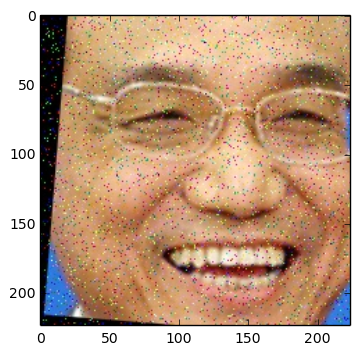

In [62]:
"""check data

"""
import cv2
import matplotlib.pyplot as plt
from random import randint
%matplotlib inline

img_rt = "/home/deep/develop/caffe/data/politics_project_data/data_11_16/imges_aug"
lis = []
with open('/home/deep/develop/caffe/data/politics_project_data/data_11_16/train_aug_list.txt') as f:
    for line in f:
        path, label = line.strip().split(' ',1)
        lis.append([path, label])
#         print label

i = randint(0, 20000)
img = cv2.imread(lis[i][0])
# print img.shape
plt.imshow(img[:,:,[2,1,0]])
print lis[i]
# print lis
